<a href="https://colab.research.google.com/github/kushpal/Machine-Learning/blob/master/Naive_Bayes_and_Active_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Implement Gaussian Naive Bayes from scratch without using scikit-learn. For each of the input feature, you have to compute the mean and the variance independently, and then use this information to model the individual probabilities of: P(feature i | class) and P(class). These can then be used to compute P(class | feature 1 ,feature 2 ,...).**

<br>

>*Show the usage of your implementation on the IRIS dataset. For all our experiments, we will only be making use of sepal-length and petal-width as the two features. First, randomly shuffle the dataset. Then, Use the first 70% of the dataset for training and report the test
performance on the remaining 30%.*

---

In [0]:
import numpy as np
import pandas as pd



def mean(X_train,y_train):
    y_train=np.array(y_train)
    Mean={}
    for i in np.unique(y_train):
        for j in X_train:
            l=0
            mn=0.0
            cn=0
            for k in X_train[j]:
                if i == y_train[l]:
                    mn+=k
                    cn+=1
                l+=1
            Mean[i,j]=mn/cn
            
    return Mean

def var(X_train,y_train):
    y_train=np.array(y_train)
    Var={}
    Mean=mean(X_train,y_train)
    for i in np.unique(y_train):
        for j in X_train:
            l=0
            mn=0.0
            cn=0
            for k in X_train[j]:
                if i in y_train[l]:
                    mn+=(k-Mean[i,j])**2
                    cn+=1
                l+=1
            Var[i,j]=mn/(cn-1)
            
    return Var

## takes argument as dic()
def find_max_prob_class(cls):
    maxs=-1
    for i in cls:
        if cls[i]>maxs:
            maxs=cls[i]
            sk=i
    return sk

def prediction(X_test,X_train,y_train):
    clas_prob={}
    cl=0.0
    y_pred=[]
    classes=find_no_of_individual_class(y_train)
    cl_prob=find_class_prob(classes)
    Var=var(X_train,y_train)
    Mean=mean(X_train,y_train)
    for k in range(len(X_test)):
        for i in np.unique(y_train):
            cl=cl_prob[i]
            for j in X_train.columns:
                p=X_test[j]
                p=np.array(p)
                cl*=Gaussion(p[k],Mean[i,j],np.sqrt(Var[i,j]))    
            clas_prob[i]=cl  
        y_pred.append(find_max_prob_class(clas_prob))
        
    return y_pred



def find_no_of_individual_class(y_train):
    y_train=np.array(y_train)
    classes={}
    for i in np.unique(y_train):
        cn=0
        for j in y_train:
            if i==j:
                cn+=1
        classes[i]=cn
    return classes
    
def find_class_prob(classes):
    prob={}
    tot=0.0
    for i in classes:
        tot+=classes[i]
    for i in classes:
        prob[i]=classes[i]/tot
        
    return prob    

def Gaussion(x, mean, stdev):
    exponent = np.exp(-(np.power(x-mean,2)/(2*np.power(stdev,2))))
    return (1 / (np.sqrt(2*np.pi) * stdev)) * exponent


In [0]:
ds=pd.read_csv("iris.csv")
ds=ds.drop(['SepalWidthCm','PetalLengthCm','Id'],axis=1)

In [0]:
y=ds['Species']
X=ds.drop(['Species'],axis=1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=49)

In [0]:
y_pred_new=prediction(X_test,X_train,y_train)

In [0]:
from sklearn import metrics
metrics.accuracy_score(y_pred_new,y_test)

0.95999999999999996

In [0]:
#EXAMPLE :
    
 '''   
data={'person' : ['male','male','male','male','female','female','female','female'],'height':[6,5.92,5.58,5.92,5,5.5,5.42,5.75]
     ,'weight':[180,190,170,165,100,150,130,150],'footsize':[12,11,12,10,6,8,7,9]}

fds=pd.DataFrame(data)
y_train=fds['person']

X_train=fds.drop(['person'],axis=1)
newdata={'height':[6],'weight':[130],'footsize':[8]}
X_test=pd.DataFrame(newdata)

y_pred_new=prediction(X_test,X_train,y_train)
from sklearn import metrics
metrics.accuracy_score(y_pred_new,y_test) '''

"   \n        data={'person' : ['male','male','male','male','female','female','female','female'],'height':[6,5.92,5.58,5.92,5,5.5,5.42,5.75]\n             ,'weight':[180,190,170,165,100,150,130,150],'footsize':[12,11,12,10,6,8,7,9]}\n\n        fds=pd.DataFrame(data)\n        y_train=fds['person']\n\n        X_train=fds.drop(['person'],axis=1)\n        newdata={'height':[6],'weight':[130],'footsize':[8]}\n        X_test=pd.DataFrame(newdata)\n\n        y_pred_new=prediction(X_test,X_train,y_train)\n        from sklearn import metrics\n        metrics.accuracy_score(y_pred_new,y_test) "

<br>

---

**We will now use active learning to improve the performance of training over the IRIS dataset. We will use the first 10% of the samples of the shuffled IRIS dataset for training set, and the last 30% as the test set. The remaining 60% of the samples will serve as the pool set which we can query to obtain new labeled instances.**

---

<br>


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=8)
X_test, X_pool, y_test, y_pool = train_test_split(X_test, y_test, test_size=0.60, random_state=8)

In [0]:
y_pred_new=prediction(X_test,X_train,y_train)
from sklearn import metrics

print(metrics.accuracy_score(y_pred_new,y_test))


0.777777777778


In [0]:
ele={}
k1=0
def find_max_prob_class1(cls):
    maxs=-1
    global k1
    k1+=1
    for i in cls:
        if cls[i]>maxs:
            maxs=cls[i]
            sk=i
    ele[k1,sk]=maxs

def active_learning(X_test,X_train,y_train):
    clas_prob={}
    cl=0.0
    y_pred=[]
    classes=find_no_of_individual_class(y_train)
    cl_prob=find_class_prob(classes)
    Var=var(X_train,y_train)
    Mean=mean(X_train,y_train)
    for k in range(len(X_test)):
        for i in np.unique(y_train):
            cl=cl_prob[i]
            for j in X_train.columns:
                p=X_test[j]
                p=np.array(p)
                cl*=Gaussion(p[k],Mean[i,j],np.sqrt(Var[i,j]))    
            clas_prob[i]=cl  
        find_max_prob_class1(clas_prob)
        

In [0]:
def find_key(ele):
    maxa=min(ele.values())
    mn=1000100100
    for i in ele:
        if ele.get(i)==maxa:
            mn=i
    return mn

In [0]:
acc_prev=[]
for i in range(15):
    ele={}
    k1=0
    active_learning(X_pool,X_train,y_train)
    key=find_key(ele)
    row=X_pool.iloc[key[0]-1]
    X_pool=X_pool.drop(X_pool.index[key[0]-1])
    X_train=X_train.append(row)
    y_train.loc[len(y_train)+1000]=y_pool[y_pool.index[key[0]-1]]
    y_pool=y_pool.drop(y_pool.index[key[0]-1])
    y_pred_new=prediction(X_test,X_train,y_train)
    acc=metrics.accuracy_score(y_pred_new,y_test)*100
    acc_prev.append(acc)
    print("ITR :",i+1,",  Accuracy : ",acc)
    

ITR : 1 ,  Accuracy :  83.3333333333
ITR : 2 ,  Accuracy :  83.3333333333
ITR : 3 ,  Accuracy :  83.3333333333
ITR : 4 ,  Accuracy :  92.5925925926
ITR : 5 ,  Accuracy :  92.5925925926
ITR : 6 ,  Accuracy :  92.5925925926
ITR : 7 ,  Accuracy :  92.5925925926
ITR : 8 ,  Accuracy :  94.4444444444
ITR : 9 ,  Accuracy :  94.4444444444
ITR : 10 ,  Accuracy :  94.4444444444
ITR : 11 ,  Accuracy :  92.5925925926
ITR : 12 ,  Accuracy :  92.5925925926
ITR : 13 ,  Accuracy :  94.4444444444
ITR : 14 ,  Accuracy :  94.4444444444
ITR : 15 ,  Accuracy :  94.4444444444


<br>

---
>**(i)**. We will retrain our above Gaussian Naive bayes model on the new train set (consisting of 10% of the
samples). As before, we will only be making use of sepal-length and petal-width as the two features.
Next, we will do 10 iterations of active learning where we will query on point from the pool set, acquire
its labels, add that instance to the train set and remove from the pool set. For each time a new instance is
added to the train set, we retrain our model and compute the test accuracy. The querying strategy is to
choose the instance with least confidence (Naive Bayes is well suited for this application since it directly
gives us the probabilities of different classes given the observed features)**

---

In [0]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
np.random.seed(0)

In [0]:
df=ds
df['x']= df['SepalLengthCm']
df['y']=df['PetalWidthCm']
df['class']=df['Species']
df=df.drop(['SepalLengthCm','PetalWidthCm','Species'],axis=1)
le = preprocessing.LabelEncoder()
le.fit(df['class'])
df['class']=le.transform(df['class'])

In [0]:
df

,x,y,class
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
3,4.6,0.2,0
4,5.0,0.2,0
5,5.4,0.4,0
6,4.6,0.3,0
7,5.0,0.2,0
8,4.4,0.2,0
9,4.9,0.1,0


In [0]:
dataset_train = df.sample(n=15, random_state=0)

In [0]:
from sklearn.naive_bayes import GaussianNB as GNB
l=GNB()

In [0]:
l.fit(dataset_train[['x','y']], dataset_train['class'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
source = pd.DataFrame({'x': xx.ravel(),
                     'y': yy.ravel(),
                     'z': Z.ravel()})

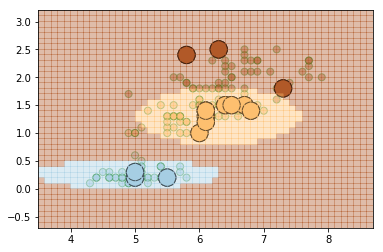

In [0]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='g', s=50 )
plt.scatter(dataset_train['x'], dataset_train['y'], c= dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )


plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)

In [0]:
least_confident_ix = pd.DataFrame(l.predict_proba(df[['x','y']])).max(axis=1).idxmin()
least_confident_ix

77

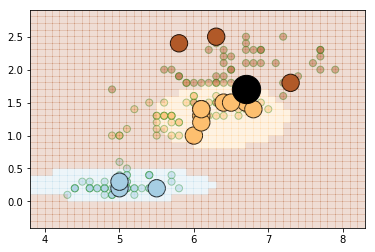

In [0]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='g', s=50 )
plt.scatter(dataset_train['x'], dataset_train['y'], c= dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(df.iloc[least_confident_ix]['x'], df.iloc[least_confident_ix]['y'], c= 'k', 
            edgecolors='k', s=800, cmap=plt.cm.Paired )

In [0]:
new_dataset_train = dataset_train.append(df.iloc[least_confident_ix])
new_dataset_train

,x,y,class
114,5.8,2.4,2.0
62,6.0,1.0,1.0
33,5.5,0.2,0.0
107,7.3,1.8,2.0
7,5.0,0.2,0.0
100,6.3,2.5,2.0
40,5.0,0.3,0.0
86,6.7,1.5,1.0
76,6.8,1.4,1.0
71,6.1,1.3,1.0


In [0]:
l = GNB()
l.fit(new_dataset_train[['x','y']], new_dataset_train['class'])
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

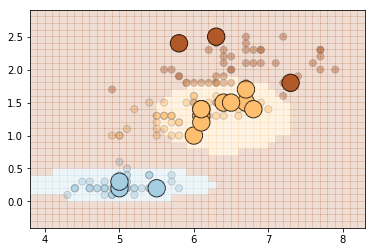

In [0]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [0]:
least_confident_ix = pd.DataFrame(l.predict_proba(df[['x','y']])).max(axis=1).idxmin()
least_confident_ix

126

In [0]:
df.iloc[least_confident_ix]['class']

2.0

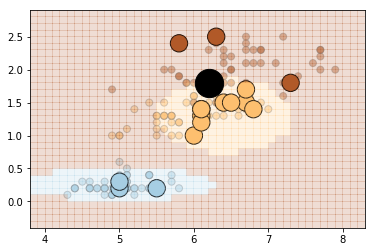

In [0]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(df.iloc[least_confident_ix]['x'], df.iloc[least_confident_ix]['y'], c= 'k', 
            edgecolors='k', s=800, cmap=plt.cm.Paired )

In [0]:
new_dataset_train = new_dataset_train.append(df.iloc[least_confident_ix])
new_dataset_train

,x,y,class
114,5.8,2.4,2.0
62,6.0,1.0,1.0
33,5.5,0.2,0.0
107,7.3,1.8,2.0
7,5.0,0.2,0.0
100,6.3,2.5,2.0
40,5.0,0.3,0.0
86,6.7,1.5,1.0
76,6.8,1.4,1.0
71,6.1,1.3,1.0


In [0]:
l = GNB()
l.fit(new_dataset_train[['x','y']], new_dataset_train['class'])
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

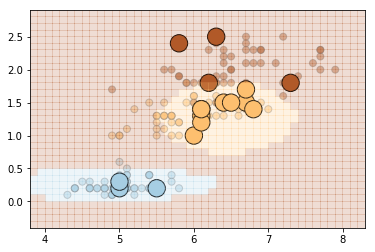

In [0]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [0]:
least_confident_ix = pd.DataFrame(l.predict_proba(df[['x','y']])).max(axis=1).idxmin()
least_confident_ix

66

In [0]:
df.iloc[least_confident_ix]['class']

1.0

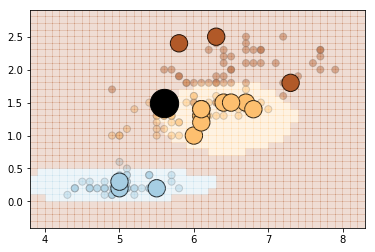

In [0]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(dataset_train['x'], dataset_train['y'], c= dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(df.iloc[least_confident_ix]['x'], df.iloc[least_confident_ix]['y'], c= 'k', 
            edgecolors='k', s=800, cmap=plt.cm.Paired )

In [0]:
new_dataset_train = new_dataset_train.append(df.iloc[least_confident_ix])
new_dataset_train

,x,y,class
114,5.8,2.4,2.0
62,6.0,1.0,1.0
33,5.5,0.2,0.0
107,7.3,1.8,2.0
7,5.0,0.2,0.0
100,6.3,2.5,2.0
40,5.0,0.3,0.0
86,6.7,1.5,1.0
76,6.8,1.4,1.0
71,6.1,1.3,1.0


In [0]:
l = GNB()
l.fit(new_dataset_train[['x','y']], new_dataset_train['class'])
x_min, x_max = df['x'].values.min() - .8, df['x'].max() + .8
y_min, y_max = df['y'].min() - .8, df['y'].max() + .8
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

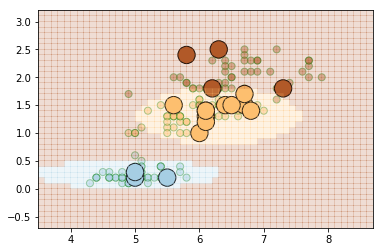

In [0]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='g', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

<br>

---

>**(ii)** Compare the accuracy of the above active learning strategy with random sampling where we query a
sample at random from the pool set. Repeat this experiment over 5 different random seeds and make
a plot with x-axis showing the number of queries, y-axis shows the accuracy on the test set. There are
two lines to show - Naive Bayes with least confidence estimation, and a line showing mean and standard
deviation for the random estimate.

---


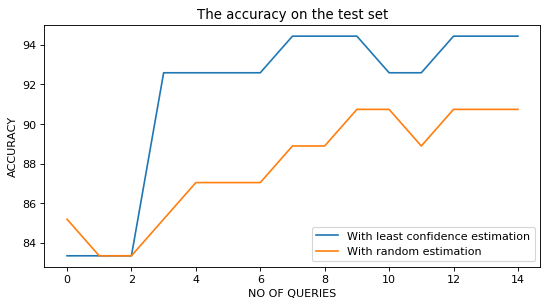

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
acc_new=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=8)
X_test, X_pool, y_test, y_pool = train_test_split(X_test, y_test, test_size=0.60, random_state=8)

for i in range(15):
    ele={}
    k1=0
    np.random.seed(np.random.randint(5))
    active_learning(X_pool,X_train,y_train)
    key=np.random.randint(81)
    row=X_pool.iloc[key-1]
    X_pool=X_pool.drop(X_pool.index[key-1])
    X_train=X_train.append(row)
    y_train.loc[len(y_train)+1000]=y_pool[y_pool.index[key-1]]
    y_pool=y_pool.drop(y_pool.index[key-1])
    y_pred_new=prediction(X_test,X_train,y_train)
    acc=metrics.accuracy_score(y_pred_new,y_test)*100
    acc_new.append(acc)
    #print("ITR :",i+1,",  Accuracy : ",acc)
plt.plot(np.arange(0,15),acc_prev)
plt.plot(np.arange(0,15),acc_new)
plt.ylabel("ACCURACY")
plt.xlabel("NO OF QUERIES")
plt.title("The accuracy on the test set")
plt.legend(['With least confidence estimation','With random estimation'],loc='lower right')

**References:**

[1]. https://colab.research.google.com/github/nipunbatra/nipunbatra.github.io/blob/master/blog/2019/active-learning-motivation.ipynb#scrollTo=r2n_fiWaXIjc